In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
shp = '1-introData/countries.gpkg'
countries = gpd.read_file(shp)

/home/andrew/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [13]:
# First 5 rows
countries.head()

# Rows and columns of the countries data
countries.shape

# Describtive statistics of the countries data
countries.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


In [14]:
# 2. Read Cities --> Geojson Format
cities = gpd.read_file('1-introData/cities.geojson')

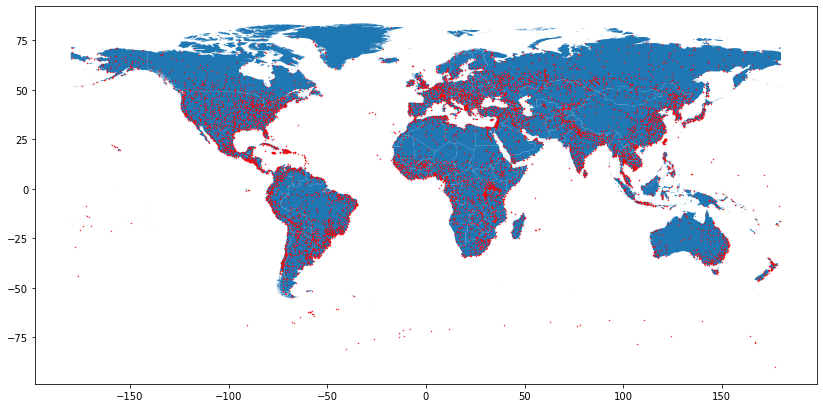

In [17]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(14, 12))
countries.plot(ax=ax)
cities.plot(markersize=0.2, color='red',ax=ax)
plt.show()

In [18]:
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [19]:
countries_projected = countries.to_crs({'init': 'epsg:3395'})

countries_projected['geometry'][:5]

/home/andrew/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

In [24]:
cities_projected = cities.to_crs({'init': 'epsg:3395'})

cities_projected['geometry'][:5]

/home/andrew/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


0    POINT (-6438719.623 -4069248.462)
1    POINT (-6334189.963 -3944125.489)
2    POINT (-6490371.310 -3890411.118)
3    POINT (-6265506.386 -4077048.683)
4    POINT (-6257825.002 -4018149.162)
Name: geometry, dtype: geometry

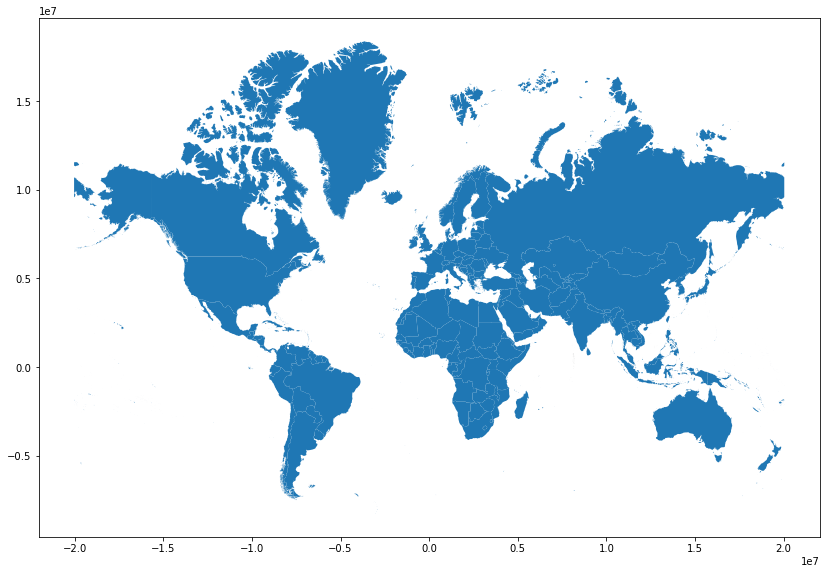

In [26]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(14, 12))
countries_projected.plot(ax=ax)
#cities_projected.plot(markersize=0.2, color='red',ax=ax)
plt.show()

# Write to a file

In [27]:
shp = '1-introData/countries_epsg3395.shp'
countries_projected.to_file(shp)